<h1><center>HY473
<br>
3rd Assignment
<br>
Athanasios Panagiotis Rentzelas
<br>
csd4734</center></h1>   

In [93]:
import numpy as np
import csv 
import matplotlib.pyplot as plt
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource

<font size="5"><u><b>Part A:</b></u></font>

In [94]:
with open('dataA_MLE.csv', 'rt') as f:
    reader = csv.reader(f)
    # next(reader)
    data_as_list = list(reader)
    data_as_array = np.array(data_as_list,dtype=float)

    #delete the 3rd column which refers to the class
    class_0= data_as_array[data_as_array[:,2]==0]
    class_0=np.delete(class_0, 2, 1)
    class_1= data_as_array[data_as_array[:,2]==1]
    class_1=np.delete(class_1, 2, 1)
    class_2= data_as_array[data_as_array[:,2]==2]
    class_2=np.delete(class_2, 2, 1)
    #take the values of the first and second column
    X = data_as_array[:,0]
    Y = data_as_array[:,1]
    classes=data_as_array[:,2]

<font size="3"><b>1)</b></font>

In [95]:
#calculate the mean of each class
def mean_calc(array):
    x_mean=0
    y_mean=0
    for i in range(len(array)):
        x_mean+=array[i][0]
        y_mean+=array[i][1]
    x_mean=x_mean/len(array)
    y_mean=y_mean/len(array)
    return np.array([x_mean,y_mean])

<font size="3"><b>2)</b></font>

In [96]:
#calculate the covariance matrix
def cov_calc(array):
    means=mean_calc(array)
    cov=np.zeros((len(array[1,:]),len(array[1,:])))
    for i in range(len(cov)):
        for j in range(len(cov)):
            for z in range(len(array)):
                cov[i][j]+=(array[z][i]-means[i])*(array[z][j]-means[j])
    cov=cov/len(array)
    return np.array(cov)

<font size="3"><b>3)</b></font>

In [97]:
print("Mean of class 0 is: ",mean_calc(class_0),"\nand the covariance matrix is:\n ",cov_calc(class_0))
print("--------------------------------------------------------")
print("Mean of class 1 is: ",mean_calc(class_1),"\nand the covariance matrix is:\n ",cov_calc(class_1))
print("--------------------------------------------------------")
print("Mean of class 2 is: ",mean_calc(class_2),"\nand the covariance matrix is:\n ",cov_calc(class_2))

Mean of class 0 is:  [29.20903802 16.84988855] 
and the covariance matrix is:
  [[46.98591258 22.90532295]
 [22.90532295 48.63133559]]
--------------------------------------------------------
Mean of class 1 is:  [40.19766916 34.28109099] 
and the covariance matrix is:
  [[ 9.42390491 11.48971771]
 [11.48971771 20.10805596]]
--------------------------------------------------------
Mean of class 2 is:  [27.55232503 34.79318037] 
and the covariance matrix is:
  [[13.96874391 11.77433636]
 [11.77433636 25.28848192]]


<font size="3"><b>4)</b></font>

In [98]:
#calculate the gaussian distribution for class 0
def gauss_calc_class0(sample):
    means = mean_calc(class_0)
    covs = cov_calc(class_0)
    meansm = np.array(means)
    covsm = np.array(covs)
    samplem = np.array(sample, dtype=float)
    dist = np.array(np.zeros_like(sample), dtype=float)
    dist = samplem-meansm
    dist_tr = np.transpose(dist)
    cov_inv = np.linalg.inv(covsm)
    cov_det=np.linalg.det(covsm)
    exp_inp = -(1/2)*(dist_tr@cov_inv)@dist
    e=np.exp(exp_inp)
    res = e/np.sqrt(((2*(np.pi))**2)*cov_det)
    return res
#calculate the gaussian distribution for class 1
def gauss_calc_class1(sample):
    means = mean_calc(class_1)
    covs = cov_calc(class_1)
    meansm = np.array(means)
    covsm = np.array(covs)
    samplem = np.array(sample, dtype=float)
    dist = np.array(np.zeros_like(sample), dtype=float)
    dist = samplem-meansm
    dist_tr = np.transpose(dist)
    cov_inv = np.linalg.inv(covsm)
    cov_det=np.linalg.det(covsm)
    exp_inp = -(1/2)*(dist_tr@cov_inv)@dist
    e=np.exp(exp_inp)
    res = e/np.sqrt(((2*(np.pi))**2)*cov_det)
    return res
#calculate the gaussian distribution for class 2
def gauss_calc_class2(sample):
    means = mean_calc(class_2)
    covs = cov_calc(class_2)
    meansm = np.array(means)
    covsm = np.array(covs)
    samplem = np.array(sample, dtype=float)
    dist = np.array(np.zeros_like(sample), dtype=float)
    dist = samplem-meansm
    dist_tr = np.transpose(dist)
    cov_inv = np.linalg.inv(covsm)
    cov_det=np.linalg.det(covsm)
    exp_inp = -(1/2)*(dist_tr@cov_inv)@dist
    e=np.exp(exp_inp)
    res = e/np.sqrt(((2*(np.pi))**2)*cov_det)
    return res
#calculate the gaussian distribution for all classes and return the maximum
def gauss_calc(sample):
    res = np.zeros([3])
    res[0] = gauss_calc_class0(sample)
    res[1] = gauss_calc_class1(sample)
    res[2] = gauss_calc_class2(sample)
    return max(res)

In [99]:
margin = 1
xlim = (np.min(X)-margin, np.max(X)+margin)
ylim = (np.min(Y)-margin, np.max(Y)+margin)
sample_rate = 100

xg = np.linspace(xlim[0], xlim[1], sample_rate)
yg = np.linspace(ylim[0], ylim[1], sample_rate)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
z0=np.apply_along_axis(gauss_calc_class0, 1,Xgrid).reshape(xx.shape)
z1=np.apply_along_axis(gauss_calc_class1, 1, Xgrid).reshape(xx.shape)
z2=np.apply_along_axis(gauss_calc_class2, 1, Xgrid).reshape(xx.shape)

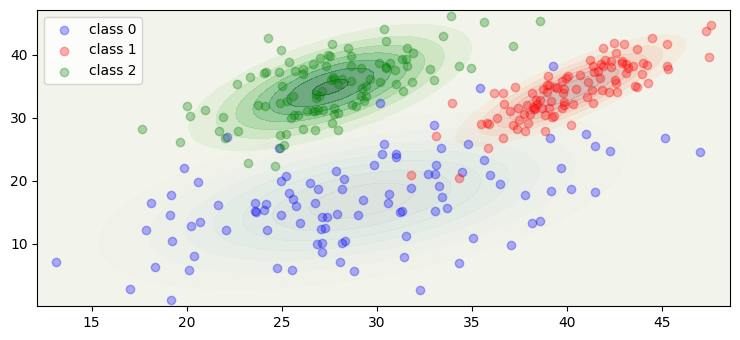

In [100]:
plt.contourf(xx, yy, z0, cmap='Blues', alpha=0.6)
plt.contourf(xx, yy, z1, cmap='Reds', alpha=0.6)
plt.contourf(xx, yy, z2, cmap='Greens', alpha=0.6)
plt.scatter(class_0[:,0], class_0[:,1], c='blue', label='class 0',alpha=0.3)
plt.scatter(class_1[:,0], class_1[:,1], c='red', label='class 1',alpha=0.3)
plt.scatter(class_2[:,0], class_2[:,1], c='green', label='class 2',alpha=0.3)
plt.legend()
plt.show()



<font size="4">Here we have a plot showing the surfaces of each class projected onto a plane. We observe how much weaker the blue color of class 0 is, as it has a larger variance than the other classes and therefore smaller probability values and also is more spread out.</font>

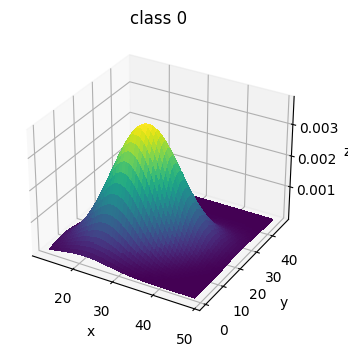

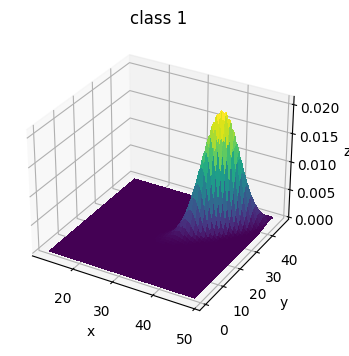

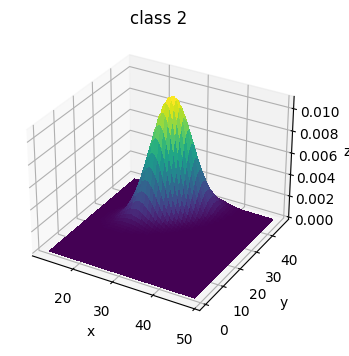

In [101]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, z0, cmap=cm.viridis,
                        linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('class 0')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, z1, cmap=cm.viridis,
                        linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('class 1')
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, z2, cmap=cm.viridis,
                        linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('class 2')
plt.show()

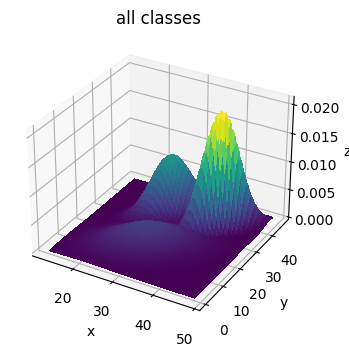

In [102]:
z=np.array([z0,z1,z2])
z=np.amax(z,axis=0).reshape(xx.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, z, cmap=cm.viridis,
                        linewidth=0, antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('all classes')
plt.show()

<font size="4">Here are all 3 classes together, represented by the same color, taking the maximum value from the three classes for each point in order to highlight their peaks.</font>

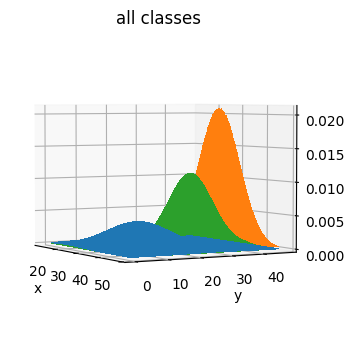

In [103]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

surf = ax.plot_surface(xx, yy, z0, rstride=1, cstride=1,
                       linewidth=0, antialiased=False, shade=False)
surf = ax.plot_surface(xx, yy, z1, rstride=1, cstride=1,
                       linewidth=0, antialiased=False, shade=False)
surf = ax.plot_surface(xx, yy, z2, rstride=1, cstride=1,
                        linewidth=0, antialiased=False, shade=False)
ax.view_init(3, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('all classes')
plt.show()

<font size="4">I am delivering it also like this, with all three classes together with different colors for each class. However, I have adjusted the angle because otherwise class_0, which has the largest variance of the three and therefore a much more spread-out distribution, was not clearly visible alongside the others.</font>

<font size="5"><u><b>Part B:</b></u></font>

In [104]:
with open('dataB_Parzen.csv', 'rt') as f:
    reader = csv.reader(f)
    data_as_list = list(reader)
    data = np.array(data_as_list,dtype=float)
    data = np.sort(data, axis=0)

<font size="3"><b>1)</b></font>

In [105]:
def window_func_hypercube(sample,h,centre):
    if np.abs(sample-centre)<=h/2:
        return 1
    else:
        return 0    

<font size="3"><b>2)</b></font>

In [106]:
def window_func_gauss(sample,h,centre):
    return np.exp(-(((sample-centre)/h)**2/2))/((np.sqrt(2*np.pi))*h)

<font size="3"><b>3)</b></font>

In [107]:
def window_func(sample,h,centre,type):
    if type=='hypercube':
        return window_func_hypercube(sample,h,centre)
    elif type=='gauss':
        return window_func_gauss(sample,h,centre)

<font size="3"><b>4)</b></font>

In [108]:
def parzen_density(data,h,centre,type):
    res = np.sum([window_func(sample,h,centre,type) for sample in data])/(len(data))
    return res


In [109]:
def calc_distribution(data,h,type):
    res = np.array([parzen_density(data,h,centre,type) for centre in data])
    return res

<font size="3"><b>5)</b></font>

<font size="2"><b>a:</b></font>

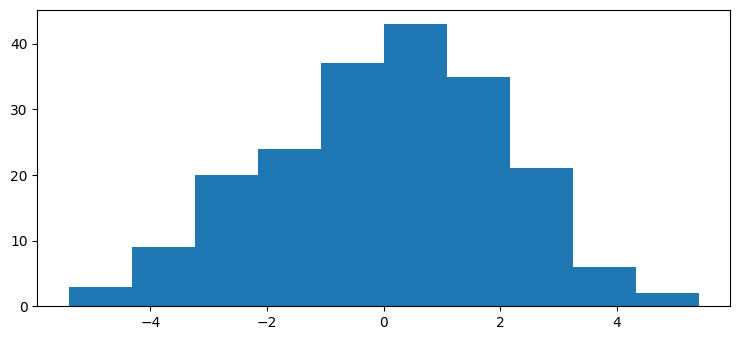

In [110]:
plt.hist(data)
plt.show()

In [111]:
print("The mean of the data is",data.mean(),"and the variance is",data.var())

The mean of the data is 0.07018604583587632 and the variance is 3.871754730075908


<font size="2"><b>b)</b></font>

In [112]:
def MSE_calc(y1,y2):
    return np.sum((y1-y2)**2)/len(y1)

In [113]:
from scipy.stats import norm

In [114]:
h_vals = np.arange(0.2,10,0.1)

#Prediciton for Gaussian window
pred_gauss = np.array([calc_distribution(data,h,'gauss') for h in h_vals])

#Prediciton for Hypercube window
pred_hypercube = np.array([calc_distribution(data,h,'hypercube') for h in h_vals])

In [115]:
def normalize_prediction(prediction):
    return prediction/np.sum(prediction)

#Normalise the predictions
pred_gauss = np.array([normalize_prediction(pred) for pred in pred_gauss]) 
pred_hypercube= np.array([normalize_prediction(pred) for pred in pred_hypercube])

In [116]:
#Create the true distribution
true_like = norm.pdf(data,1,2)
true_like /= true_like.sum()
true_like = true_like.reshape(pred_gauss[0].shape)

In [117]:
#Calculate the MSE for each h value
gauss_errors = np.array([MSE_calc(true_like, pred_gauss[i]) for i in range(len(h_vals))])
hypercube_errors= np.array([MSE_calc(true_like, pred_hypercube[i]) for i in range(len(h_vals))])

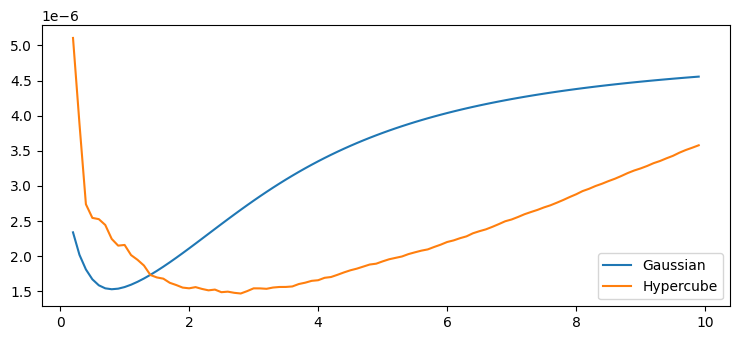

In [118]:
plt.plot(h_vals,gauss_errors,label='Gaussian')
plt.plot(h_vals,hypercube_errors,label='Hypercube')
plt.legend()
plt.show()

Above we see how the Mean Squared Error differentiates depending on the h_val for each method of parzen windows.

The best h for the Gaussian window is 0.8000000000000003 
and the best h for the Hypercube window is 2.800000000000001


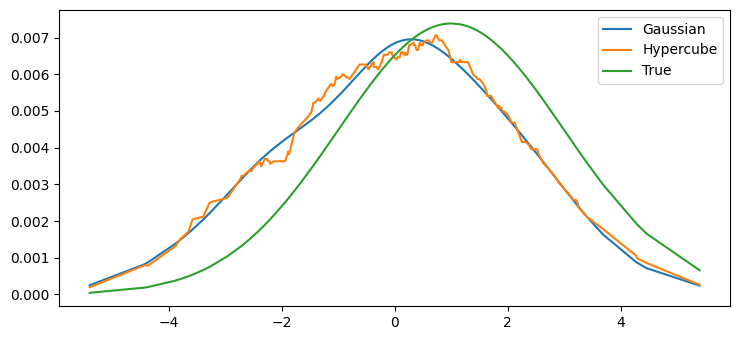

In [119]:
plt.plot(data,pred_gauss[np.argmin(gauss_errors)],label='Gaussian')
plt.plot(data,pred_hypercube[np.argmin(hypercube_errors)],label='Hypercube')
plt.plot(data,true_like,label='True')
plt.legend()
plt.plot()
print("The best h for the Gaussian window is",h_vals[np.argmin(gauss_errors)],"\nand the best h for the Hypercube window is",h_vals[np.argmin(hypercube_errors)])

<font size="5"><u><b>Part C:</b></u></font>

In [120]:
with open('dataC_ΚΝΝtrain.csv', 'rt') as f:
    reader = csv.reader(f)
    data_as_list = list(reader)
    train = np.array(data_as_list,dtype=float)
    
with open('dataC_ΚΝΝtest.csv', 'rt') as f:
    reader = csv.reader(f)
    data_as_list = list(reader)
    test = np.array(data_as_list,dtype=float)
    X = test[:,0]
    Y = test[:,1]
    classes_test=test[:,2]

<font size="3"><b>1)</b></font>

In [121]:
def calc_dist(value):
    res = np.zeros([len(train)])
    for i in range(len(train)):
        res[i]=np.sqrt((value[0]-train[i][0])**2+(value[1]-train[i][1])**2)
    return res

<font size="3"><b>2)</b></font>

In [122]:
def calc_knn(value,k):
    dist = calc_dist(value)
    dist_sort = np.argsort(dist)
    k_nearest = dist_sort[:k]
    return train[k_nearest]

<font size="3"><b>3)</b></font>

In [123]:
#Probability of a value belonging in each class
def calc_class(value,k):
    knn = calc_knn(value,k)
    class_0 = 0
    class_1 = 0
    for i in range(len(knn)):
        if knn[i][2]==0:
            class_0+=1
        else:
            class_1+=1
    return class_0/k,class_1/k

#Probability of a value belonging in each class for all values
def calc_class_test(k):
    return np.apply_along_axis(calc_class, 1,test,k)

#Predict the class of a value
#I used the None value to be able to use np.apply_along_axis both for a single value and for all values because of the way
#we use apply_along_axis along a linspace in order to create a contour plot
def pred_class(value=None,k=None):
    if value is None:
        return np.apply_along_axis(np.argmax, 1,calc_class_test(k))
    return np.argmax(calc_class(value,k))

<font size="3"><b>4)</b></font>

The k with the most accuracy is k= 11


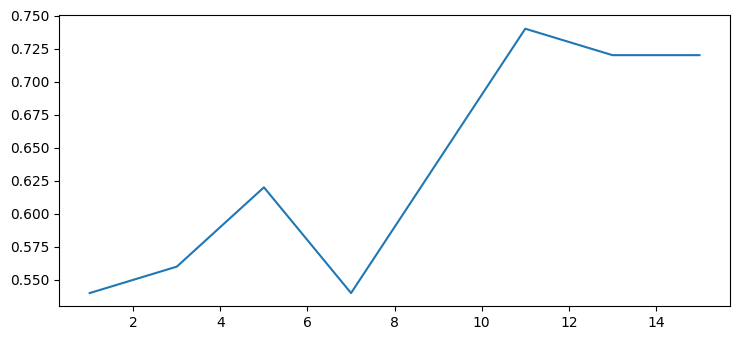

In [124]:
def calc_acc(k):
    acc = 0
    pred = pred_class(k=k)
    for i in range(len(pred)):
        if pred[i]== classes_test[i]:
            acc+=1
    return acc/len(pred)
ks=np.array([1,3,5,7,9,11,13,15],dtype=int)
accs = np.array([calc_acc(k) for k in ks])
print("The k with the most accuracy is k=",ks[np.argmax(accs)])

plt.plot(ks,accs)
plt.show()

Above we have a plot of the accuracy of our predictions depending on different k values.

<font size="3"><b>5)</b></font>

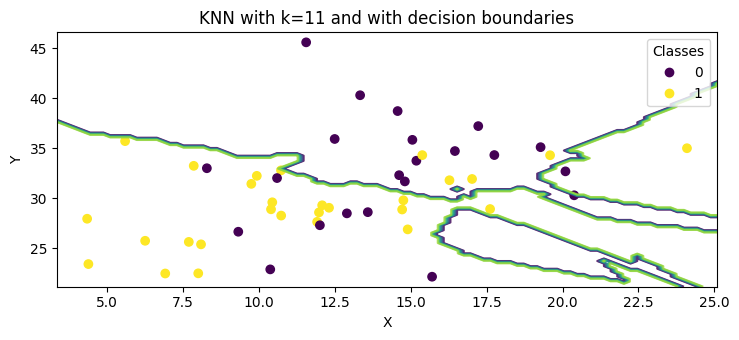

In [125]:
margin = 1
xlim = (np.min(X)-margin, np.max(X)+margin)
ylim = (np.min(Y)-margin, np.max(Y)+margin)
sample_rate = 100

xg = np.linspace(xlim[0], xlim[1], sample_rate)
yg = np.linspace(ylim[0], ylim[1], sample_rate)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

z=np.apply_along_axis(func1d=pred_class, axis=1,arr=Xgrid,k=ks[np.argmax(accs)]).reshape(xx.shape)
scatter = plt.scatter(X, Y, c=classes_test)

plot = plt.contour(xg, yg, z, alpha=0.8)
plt.title('KNN with k=11 and with decision boundaries')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend((scatter.legend_elements()[0][0], scatter.legend_elements()[0][1]), ('0', '1'), loc='upper right',title="Classes")
plt.show()